In [69]:
import json
import pandas as pd
import requests
from ipywidgets import Image
import math
import re
import operator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [70]:
def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_d

def wordcloud_plot(text, colour):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = colour,
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [62]:
with open('incindia.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [34]:
max_like = -100
maxl_index = -1
max_comments = -100
maxc_index = -1
for k in obj['posts']:
    l = k['likes']['count']
    if (l) > max_like:
        max_like = l
        maxl_index = obj['posts'].index(k)
    if k['comments']['count']>max_comments:
        max_comments = k['comments']['count']
        maxc_index = obj['posts'].index(k)
print("Most liked post ID:", obj['posts'][maxl_index]['url'].split('/')[-2])
print("Most commented post ID:",obj['posts'][maxc_index]['url'].split('/')[-2])

Most liked post ID: Bs-IxK3FTIx
Most commented post ID: BvThii1FXva


## Most liked post.

In [30]:
Image(value=requests.get(obj['posts'][maxl_index]['preview_img']).content)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00|Photoshop 3.0\x…

## Most commented post.

In [31]:
Image(value=requests.get(obj['posts'][maxc_index]['preview_img']).content)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00lPhotoshop 3.0\x…

## Popularity score -> log(views)+log(likes)+comments

In [40]:
post_list = obj['posts']
top_five_indices = []
for j in range(5):
    max_score = -100
    max_index = -1
    for k in obj['posts']:
#         print(k['views'])
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj['posts'].index(k)
    top_five_indices.append(max_index)
    del post_list[max_index]
print(top_five_indices)

[107, 362, 521, 434, 24]


In [42]:
for k in top_five_indices:
    display(Image(value=requests.get(obj['posts'][k]['preview_img']).content))

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00|Photoshop 3.0\x…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00lPhotoshop 3.0\x…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00lPhotoshop 3.0\x…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00|Photoshop 3.0\x…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00|Photoshop 3.0\x…

In [63]:
hash_list = []
for k in obj['posts']:
    if len(k['comments']['list']):
        text = k['comments']['list'][0]['comment']
        hash_list.extend(re.findall(r"#(\w+)", text))
hash_dict = {}
for j in hash_list:
        if j not in hash_dict.keys():
            hash_dict[j] = 1
        else:
            hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('Congress', 57), ('India', 33), ('NoMo', 23), ('BJP', 20), ('CongressManifesto2019', 17)]


In [65]:
with open('bjp4india.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [88]:
video_count = 0 
for k in obj['posts']:
    if not len(k['imgs']):
        video_count += 1
"There are "+str(video_count) + " video posts."

'There are 33 video posts.'

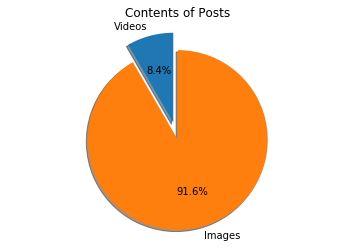

In [92]:
labels = ['Videos', 'Images']
sizes = [video_count, len(obj['posts'])-video_count]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Contents of Posts')
plt.show()

In [74]:
post_list = obj['posts']
top_200_indices = []
for j in range(200):
    max_score = -100
    max_index = -1
    for k in obj['posts']:
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj['posts'].index(k)
    top_200_indices.append(max_index)
    del post_list[max_index]
print(top_200_indices)

[521, 260, 297, 468, 57, 26, 507, 435, 31, 229, 515, 48, 260, 490, 403, 408, 344, 338, 418, 0, 481, 570, 179, 42, 543, 32, 293, 54, 464, 223, 133, 533, 435, 302, 511, 534, 297, 97, 289, 10, 415, 324, 141, 534, 471, 67, 128, 25, 53, 139, 313, 391, 254, 290, 279, 520, 201, 529, 344, 318, 458, 426, 41, 522, 90, 79, 11, 74, 256, 479, 452, 410, 502, 163, 430, 340, 407, 232, 75, 379, 199, 49, 507, 73, 61, 378, 389, 295, 495, 2, 363, 483, 454, 427, 264, 450, 454, 234, 5, 419, 427, 266, 202, 49, 230, 489, 68, 346, 470, 387, 348, 343, 404, 413, 440, 23, 127, 391, 452, 1, 24, 194, 111, 440, 455, 62, 250, 398, 71, 250, 49, 389, 8, 188, 411, 245, 131, 125, 392, 403, 173, 256, 422, 52, 87, 106, 297, 201, 216, 186, 91, 78, 285, 301, 81, 8, 138, 192, 195, 13, 134, 131, 268, 25, 187, 74, 252, 235, 53, 157, 3, 238, 346, 46, 6, 72, 142, 405, 79, 399, 409, 142, 222, 273, 339, 305, 158, 139, 253, 9, 150, 119, 9, 122, 72, 11, 97, 128, 242, 160]


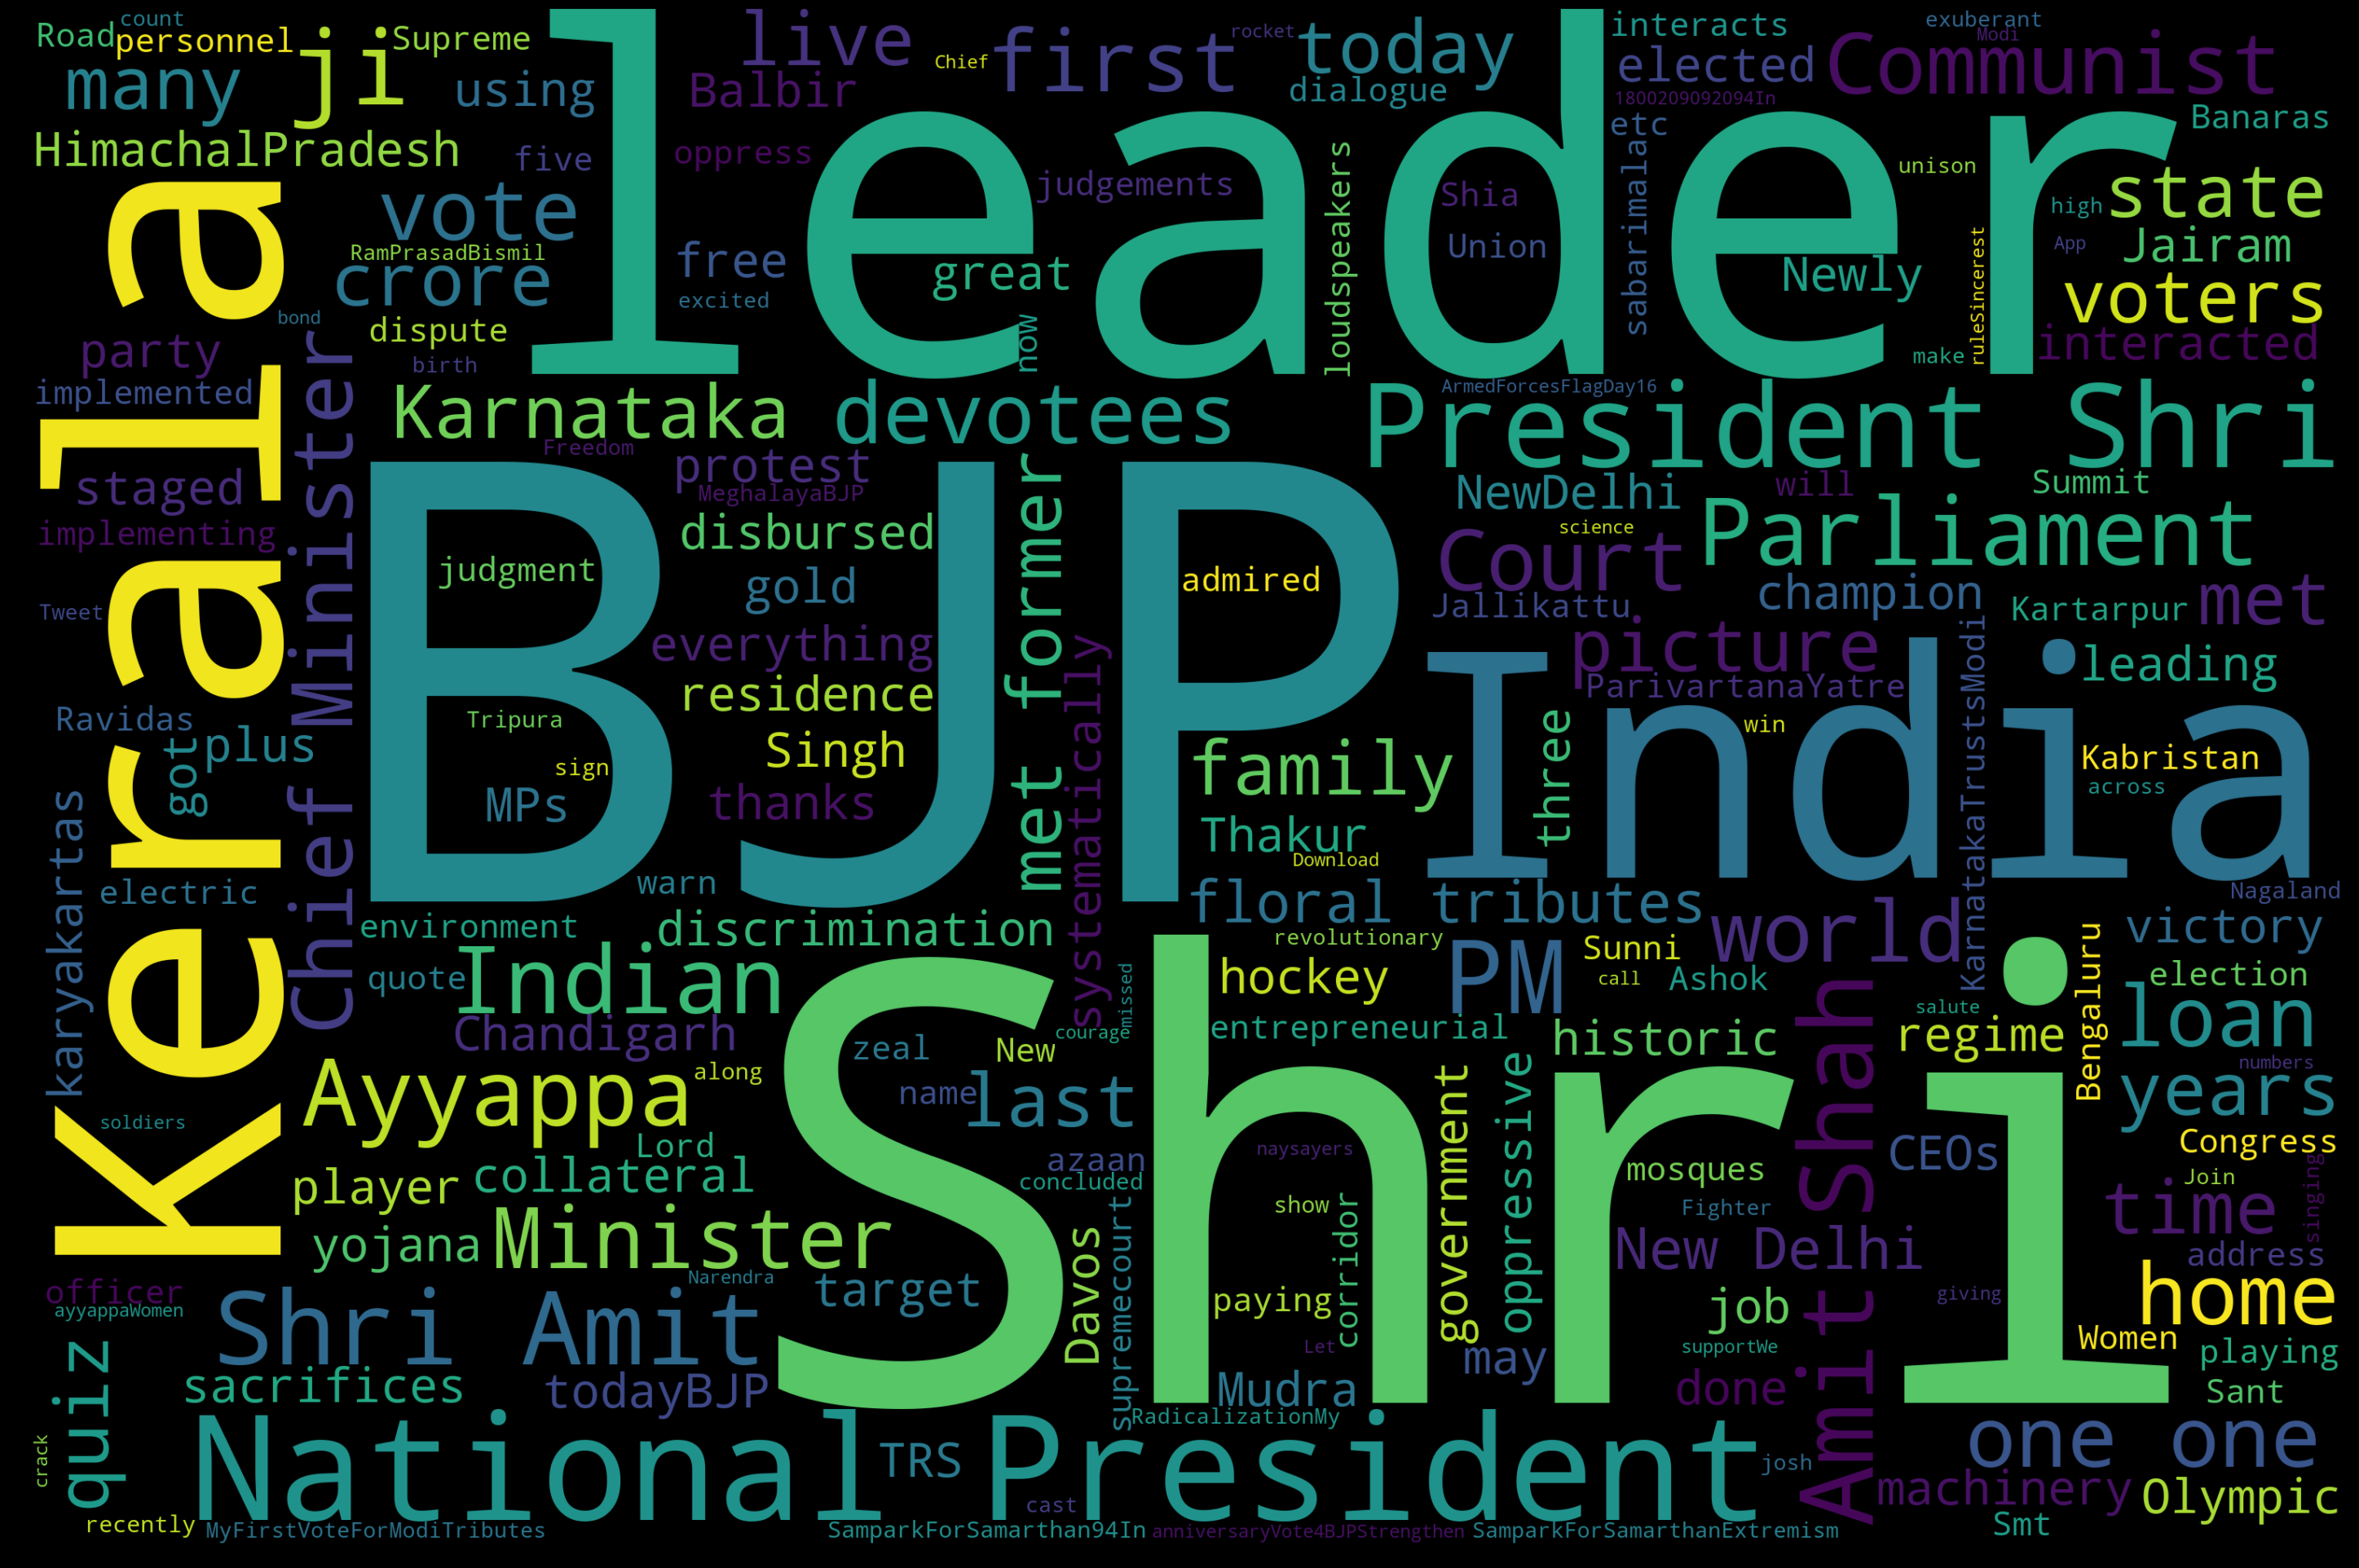

In [82]:
text_content = ''
for k in top_200_indices:
    try:
        text_content += clean_tweet(obj['posts'][k]['comments']['list'][0]['comment'])
    except:
        pass
wordcloud_plot(text_content,'black')

The most occuring words are:
1. Shri - A title used to give respect to a person. It is because the BJP follows Hinduisitic(Hindu) style of writing.
2. BJP - The name of the party, it is used for emphasis and glorification of the party.
3. leader - Calling themselves strong leaders, especially, Shri Narendra Modi.
4. India - The country of the party, signifies Nationalist feelings of the party.

In [66]:
hash_list = []
for k in obj['posts']:
    if len(k['comments']['list']):
        text = k['comments']['list'][0]['comment']
        hash_list.extend(re.findall(r"#(\w+)", text))
hash_dict = {}
for j in hash_list:
        if j not in hash_dict.keys():
            hash_dict[j] = 1
        else:
            hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('bjp', 47), ('india', 36), ('election', 24), ('vote', 23), ('MainBhiChowkidar', 16)]


In [ ]:
with open('', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [ ]:
post_list = obj['posts']
top_five_indices = []
for j in range(5):
    max_score = -100
    max_index = -1
    for k in obj['posts']:
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj['posts'].index(k)
    top_five_indices.append(max_index)
    del post_list[max_index]
print(top_five_indices)

In [ ]:
for k in top_five_indices:
    display(Image(value=requests.get(obj['posts'][k]['preview_img']).content))

In [ ]:
single_count = 0
multiple_count = 0
for k in obj['posts']:
    if (not len(k['imgs'])) or (len(k['imgs'])==1) :
        single_count += 1
    else:
        multiple_count += 1
        
labels = ['Single', 'Multiple']
sizes = [single_count, multiple_count]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Contents of Posts')
plt.show()